In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon

# Techtaste

In [ ]:
# Conjunto de dados TechTaste
df_techtaste = pd.DataFrame({'avaliacoes': [38, 44, 33, 42, 47, 33, 36, 39, 42, 36, 39, 34, 42,
                                            42, 36, 43, 31, 35, 36, 41, 42, 30, 25, 38, 47, 36,
                                            32, 45, 44, 45, 37, 48, 37, 36, 44, 49, 31, 45, 45,
                                            40, 36, 50, 38, 34, 36, 42, 46, 49, 36, 34, 38, 31,
                                            53, 40, 57, 40, 36, 42, 26, 50, 32, 43, 35, 37, 42,
                                            30, 36, 43, 40, 43, 44, 52, 37, 51, 35, 47, 40, 50,
                                            37, 49]})

df_techtaste

,avaliacoes
0,38
1,44
2,33
3,42
4,47
...,...
75,47
76,40
77,50
78,37


In [ ]:
# 1
desvio_padrao_amostral = df_techtaste['avaliacoes'].std()
print(f'Desvio padrão amostral: {desvio_padrao_amostral:.2f}')

Desvio padrão amostral: 6.42


In [ ]:
# 2
'''n = 80

qnt = 10

def reamostragem_medias(dados, coluna, n, qnt):
  medias = [dados[coluna].sample(n, replace = True).mean() for _ in range(qnt)]
  return medias

media_avaliacao = reamostragem_medias(df_techtaste, 'avaliacoes', n, qnt)
avaliacao_amostras = pd.DataFrame({'media_avaliacao': media_avaliacao})
EP = avaliacao_amostras['media_avaliacao'].std()
EP'''

erro_padrao = stats.sem(df_techtaste['avaliacoes'])
print(f'Erro padrão: {erro_padrao:.2f}')

Erro padrão: 0.72


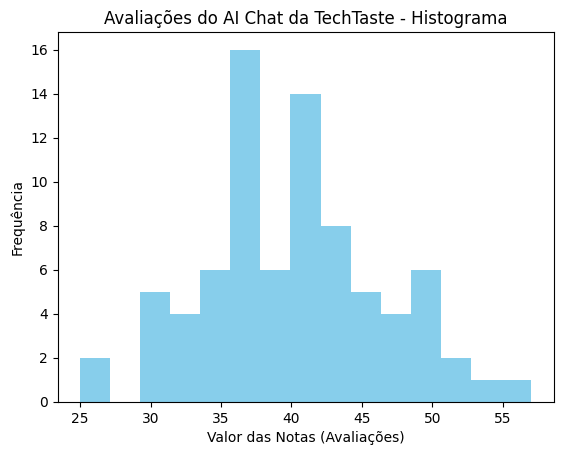

In [ ]:
# 3
plt.hist(df_techtaste, bins=15, color='skyblue')
plt.title('Avaliações do AI Chat da TechTaste - Histograma')
plt.xlabel('Valor das Notas (Avaliações)')
plt.ylabel('Frequência')

plt.show()

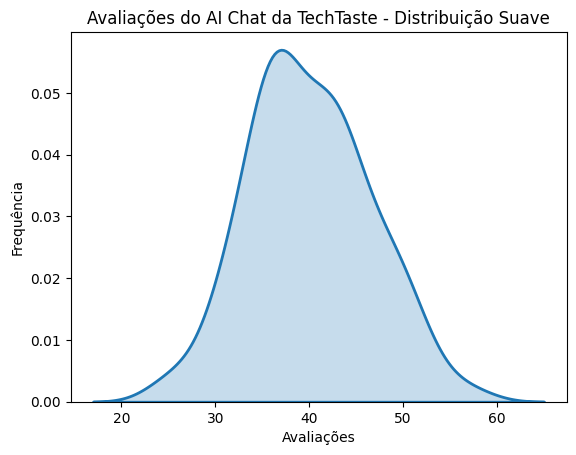

In [ ]:
sns.kdeplot(df_techtaste['avaliacoes'], linewidth=2, fill= True)

plt.xlabel('Avaliações')
plt.ylabel('Frequência')
plt.title('Avaliações do AI Chat da TechTaste - Distribuição Suave')

plt.show()

In [ ]:
# 4
'Sim'

'''
O gráfico gerado na atividade anterior sugere que as pontuações dos testes se assemelham a uma
distribuição normal. Ou seja, com a maioria das pontuações centradas em torno da média com o
característico “formato de sino” no gráfico.
'''

'\nO gráfico gerado na atividade anterior sugere que as pontuações dos testes se assemelham a uma\ndistribuição normal. Ou seja, com a maioria das pontuações centradas em torno da média com o\ncaracterístico “formato de sino” no gráfico.\n'

In [ ]:
# 5
'''confianca = 0.90
media = df_techtaste['avaliacoes'].mean()
tamanho_amostra = len(df_techtaste)

intervalo_confianca = stats.norm.interval(confianca,
                                          loc = media,
                                          scale = desvio_padrao_amostral / np.sqrt(tamanho_amostra))
print("IC (90%):", intervalo_confianca)'''

confianca = 0.90
intervalo_confianca = stats.norm.interval(confianca,
                                          loc=df_techtaste['avaliacoes'].mean(),
                                          scale=erro_padrao)

print(f'Intervalo de Confiança ({confianca*100}%): {intervalo_confianca}')

Intervalo de Confiança (90.0%): (38.84402439920928, 41.205975600790715)


In [ ]:
# 6
'Sim'
'''
O intervalo de confiança (90%) para a média das pontuações dos testes fornece uma faixa na qual
podemos ter 90% de confiança de que a verdadeira média populacional está contida. Se aumentarmos
o nível de confiança para 95%, a largura do intervalo de confiança aumentará um pouco, tornando-o
mais amplo. Podemos provar isso através do código abaixo:
'''

confianca = 0.95
intervalo_confianca = stats.norm.interval(confianca,
                                          loc=df_techtaste['avaliacoes'].mean(),
                                          scale=erro_padrao)

print(f'Intervalo de Confiança ({confianca*100}%): {intervalo_confianca}')

Intervalo de Confiança (95.0%): (38.617780776207844, 41.43221922379215)


In [ ]:
# 1
media_amostral = df_techtaste['avaliacoes'].mean().round(2)
print(f'Média Amostral: {media_amostral}')

Média Amostral: 40.02


In [ ]:
# 2
h0 = 30
# h1 != 30

In [ ]:
# 3
desvio_padrao_populacional = 2.65
tamanho_amostra = len(df_techtaste)

intervalo_confianca = stats.norm.interval(confianca,
                                          loc = h0,
                                          scale =
                                            desvio_padrao_populacional / np.sqrt(tamanho_amostra))

print(f'Intervalo de Confiança ({confianca*100}%): {intervalo_confianca}')

Intervalo de Confiança (95.0%): (29.419303816868016, 30.580696183131984)


In [ ]:
# 4
'''
Como a média amostral está fora do intervalo de confiança da hipótese nula, temos uma evidência
para rejeitar a hipótese nula.
'''

'\nComo a média amostral está fora do intervalo de confiança da hipótese nula, temos uma evidência\npara rejeitar a hipótese nula.\n'

In [ ]:
# 5
stat, p_valor = ztest(x1 = df_techtaste['avaliacoes'], value = h0,
                       alternative = "two-sided")

print(f'Estatística Z: {stat}')
print(f'Valor-p: {p_valor}')

Estatística Z: 27.89066417430603
Valor-p: 3.46291966567653e-171


In [ ]:
# 6
if p_valor < 0.05:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeitar a hipótese nula"

print("Conclusão:", conclusao)

'''
A hipótese nula formulada é rejeitada
Erro tipo 2
'''

Conclusão: Rejeitar a hipótese nula


'\nA hipótese nula formulada é rejeitada\nErro tipo 2\n'

# Techsafe

In [ ]:
# Conjunto de dados Techsafe
df_techsafe = pd.DataFrame({'porcentagem_compressao': [21.99342831, 20.7234714 , 22.29537708,
                                                       24.04605971, 20.53169325, 20.53172609,
                                                       24.15842563, 22.53486946, 20.06105123,
                                                       22.08512009, 20.07316461, 20.06854049,
                                                       21.48392454, 17.17343951, 17.55016433,
                                                       19.87542494, 18.97433776, 21.62849467,
                                                       19.18395185, 18.1753926, 23.93129754,
                                                       20.5484474 , 21.13505641, 18.15050363,
                                                       19.91123455]})

In [ ]:
# 1
h0 = 20
# h1 > 20

In [ ]:
# 2
media_amostral = np.mean(df_techsafe)
print(f'Média amostral: {media_amostral}')

Média amostral: 20.6729838832


In [ ]:
# 3
nivel_confianca = 0.95
nivel_significancia = 1-nivel_confianca
print(f'Nível de significância: {nivel_significancia}')

Nível de significância: 0.050000000000000044


In [ ]:
# 4
estatistica_t, p_valor = ttest_1samp(df_techsafe['porcentagem_compressao'], h0,
                                     alternative = 'greater')

print(f'Estatística t: {estatistica_t}')
print(f'Valor-p: {p_valor}')

Estatística t: 1.7588775656761988
Valor-p: 0.04567200091129674


In [ ]:
# 5
if p_valor < nivel_significancia:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"

print(conclusao)
print('Justificativa: p_valor < nivel_significancia')

Rejeitar a hipótese nula
Justificativa: p_valor < nivel_significancia


# Zoop Megastore - Caso 1

In [ ]:
df_equipe_vendas = pd.DataFrame({'Vendedor': [ 'Luíza', 'Bia', 'Rodrigo', 'Allan', 'Evaldo'],
                                 'Vendas Antes (R$)': [252.72, 203.91, 307.32, 185.78, 220.5],
                                 'Vendas Depois (R$)': [285.1, 223.15, 324.41, 202.23, 240.63]})

In [ ]:
# 1
# Amostras pareadas

In [ ]:
# 2
# h0: dif = 0
# h1: dif > 0

In [ ]:
# 3
resultado_subtracao = [b - a for a, b in zip(df_equipe_vendas['Vendas Antes (R$)'],
                                             df_equipe_vendas['Vendas Depois (R$)'])]
print(resultado_subtracao)

stats, p_valor = ttest_rel(df_equipe_vendas['Vendas Depois (R$)'],
                           df_equipe_vendas['Vendas Antes (R$)'], alternative = "greater")
print(f'Estatística do teste t pareado: {stats}')
print(f'Valor-p: {p_valor}')

[32.380000000000024, 19.24000000000001, 17.090000000000032, 16.44999999999999, 20.129999999999995]
Estatística do teste t pareado: 7.23705258430516
Valor-p: 0.0009672115386790286


In [ ]:
# 4
nivel_significancia = 0.05

if p_valor < nivel_significancia:
  print("Rejeitar a hipótese nula: Há evidências de que o novo programa de treinamento tem um efeito positivo nas vendas médias obtidas pelos vendedorus.")
else:
  print("Não rejeita hipótese nula: Não há evidências suficientes para afirmar um efeito positivo nas vendas médias devido ao programa de treinamento.")

Rejeitar a hipótese nula: Há evidências de que o novo programa de treinamento tem um efeito positivo nas vendas médias obtidas pelos vendedorus.


# Zoop Megastore - Caso 2

In [ ]:
df_filiais = pd.DataFrame({'Filial Centro-Norte': [3.2, 2.9, 2.0, 3.3, 3.1],
                           'Filial Sul': [3.8, 4.0, 4.7, 4.9, 4.8]})

In [ ]:
# 1
# Amostras independentes

In [ ]:
# 2
media_cn = np.mean(df_filiais['Filial Centro-Norte'])
media_s = np.mean(df_filiais['Filial Sul'])

print(media_cn)
print(media_s)

# h0: media_cn = media_s
# h1: media_cn != media_s

2.8999999999999995
4.4399999999999995


In [ ]:
# 3
stats, p_valor = ttest_ind(df_filiais['Filial Sul'],
                           df_filiais['Filial Centro-Norte'])
print(f'Estatística do teste t independente: {stats}')
print(f'Valor-p: {p_valor}')

Estatística do teste t independente: 4.73902240270431
Valor-p: 0.001465798816319686


In [ ]:
# 4
nivel_significancia = 0.05

if p_valor < nivel_significancia:
  print("Rejeitar a hipótese nula: Há evidências de que há uma diferença significativa na pontuação média de satisfação de cliente entre as filiais.")
else:
  print("Não rejeita hipótese nula: Não há evidências suficientes para afirmar há uma diferença significativa na pontuação média de satisfação do cliente entre as filiais.")

Rejeitar a hipótese nula: Há evidências de que há uma diferença significativa na pontuação média de satisfação de cliente entre as filiais.


# Playcatch - Caso 1

In [ ]:
df_avaliacoes = pd.DataFrame({
    'playcatch': [4, 5, 3, 4, 5, 4, 4, 3, 5, 4, 5, 3, 4],
    'concorrente': [3, 4, 3, 3, 2, 4, 3, 2, 3, 3, 4, 2, 3]
})
df_avaliacoes

,playcatch,concorrente
0,4,3
1,5,4
2,3,3
3,4,3
4,5,2
5,4,4
6,4,3
7,3,2
8,5,3
9,4,3


In [ ]:
# 1
playcatch = df_avaliacoes['playcatch']
concorrente = df_avaliacoes['concorrente']

# h0: playcatch = concorrente
# h1: playcatch != concorrente

In [ ]:
stats, p_valor = mannwhitneyu(playcatch, concorrente)

print(f'Estatística do teste Mann-Whitney: {stats}')
print(f'Valor-p: {p_valor}')

Estatística do teste Mann-Whitney: 140.5
Valor-p: 0.0026661275820288304


In [ ]:
# 3
nivel_significancia = 0.05

if p_valor < nivel_significancia:
  conclusao = "Rejeitar a hipótese nula"
else:
  conclusao = "Não rejeita a hipótese nula"

print('Conclusão:', conclusao)

Conclusão: Rejeitar a hipótese nula


# Playcatch - Caso 2

In [ ]:
df_wt = pd.DataFrame({
    'Antes_WatchTogether': [3, 4, 3, 4, 2, 4, 3, 2, 3, 3, 4, 2, 3],
    'Depois_WatchTogether': [4, 5, 3, 4, 5, 4, 4, 3, 5, 4, 5, 3, 4]
})

df_wt

,Antes_WatchTogether,Depois_WatchTogether
0,3,4
1,4,5
2,3,3
3,4,4
4,2,5
5,4,4
6,3,4
7,2,3
8,3,5
9,3,4


In [ ]:
# 1
antes = df_wt['Antes_WatchTogether']
depois = df_wt['Depois_WatchTogether']

h0 = 0
# h1 > 0

In [ ]:
# 2
stats, p_valor = wilcoxon(depois, antes, alternative="greater")

print(f'Estatística do teste de Wilcoxon: {stats}')
print(f'Valor-p: {p_valor}')

Estatística do teste de Wilcoxon: 55.0
Valor-p: 0.0014903523101034196


In [ ]:
# 3
nivel_significancia = 0.05

if p_valor < nivel_significancia:
  conclusao = "Rejeitar a hipótese nula"
else:
  conclusao = "Não rejeita a hipótese nula"

print('Conclusão:', conclusao)

Conclusão: Rejeitar a hipótese nula


# Links

https://docs.scipy.org/doc/scipy/index.html

https://www.statsmodels.org/stable/index.html